In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-27 14:16:58.615252: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 14:16:58.653025: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 14:16:59.195382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Desagregação - RJ_Reconstrucao_Albuliformes&Elopiformes_2024_08_20.xlsx')
df_Ubarana_art = pd.DataFrame(df[['Ano','Ubarana_art']])

dados = df_Ubarana_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1990,1991,1992,1993,1994,1995,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Ubarana_art'].values
dados.head()

,Ano,Ubarana_art
26,1976,10.0
27,1977,6.0
28,1978,19.0
29,1979,21.0
30,1980,1.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [9]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=80, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Ubarana/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/80


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - loss: 0.9991
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9933
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9895
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9873
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9843
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9812
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9773
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9734
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9691
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9640
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9583
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9528
Epoch 13/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9466
Epoch 14/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9397
Epoch 15/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9326
Epoch 16/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Ubarana/pesos pesca art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[ 6.696825  ]
 [ 6.7846036 ]
 [ 6.857196  ]
 [ 6.929788  ]
 [ 7.0023904 ]
 [ 7.07497   ]
 [ 7.1475525 ]
 [ 7.220148  ]
 [ 7.2927437 ]
 [ 7.3653326 ]
 [ 7.437922  ]
 [ 7.510511  ]
 [ 7.5830984 ]
 [ 7.653461  ]
 [ 7.7160497 ]
 [ 7.778648  ]
 [ 7.841235  ]
 [ 7.9038258 ]
 [ 7.9664164 ]
 [ 8.029001  ]
 [ 8.091602  ]
 [ 8.155863  ]
 [ 8.220324  ]
 [ 8.284784  ]
 [ 8.349236  ]
 [ 8.4136915 ]
 [57.34804   ]
 [48.91696   ]
 [35.88912   ]
 [22.706589  ]
 [11.06408   ]
 [ 4.7139826 ]
 [ 0.618207  ]
 [ 0.39060688]
 [ 0.6940489 ]
 [ 1.3681574 ]
 [ 2.3784761 ]
 [ 3.9006367 ]
 [ 5.996566  ]
 [ 8.465162  ]
 [11.101973  ]
 [13.933972  ]
 [16.070972  ]
 [12.617685  ]]


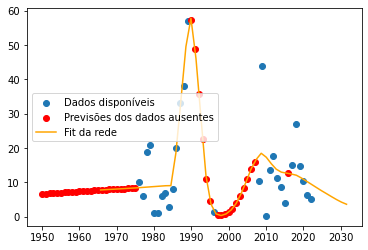

In [10]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

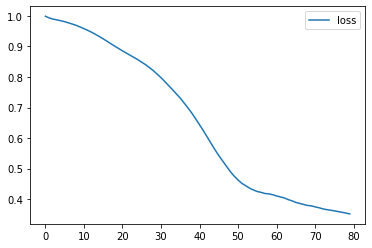

In [11]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [12]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Ubarana_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Albuliformes e Elopiformes/Ubarana/Interpolações e Extrapolações Ubarana_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Ubarana_art
0,1950,6.696825
1,1951,6.784604
2,1952,6.857196
3,1953,6.929788
4,1954,7.002390
...,...,...
62,2012,14.708582
63,2013,13.597774
64,2014,13.037224
65,2015,12.811542
